### 1) Algoritmo de Força-Bruta

1.a) [1 valor] Descreva brevemente qual seria o algoritmo de força-bruta que resolve o problema do número
de inversões num array.

1.b) [1 valor] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como
entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

1.c) [3 valores] Apresente uma análise assintótica do seu algoritmo, considerando o número de acessos ao
array (ou seja, o número de acessos para leitura e escrita de uma posição do array) que são executados para
o seu algoritmo em função do tamanho, n, do array.
Nota: É esperado que sejam apresentados os cálculos completos do número de acessos assim como a
correspondente conclusão sobre o tempo de execução do algoritmo (utilizando notação assintótica).


### 1.a)

O algoritmo de força-bruta que resolveria este problema do número de inversões num array seria um algoritmo que dado o array iria comparar cada elemento com todos os elementos à sua frente. Tendo os índices i e j iria comparar i com j tal que i < j e sempre que esta condição fosse satisfeita, seria contada a inversão.
```
count_inversions_brute_force(collection):
    //conta o numero de inversoes num array
    //Input: array
    //Output: numero de inversoes
    inversion_count = 0
    for i = 1, ..., n-1 :
        for j = 1, ..., n-1 :
            if col[i] > col[j]:
               inversion_count += 1
```

### 1.b)

In [ ]:
def count_inversions_brute_force(col):
    n = len(col)
    inversion_count = 0
    for i in range(n):
        for j in range(i + 1, n):
            if col[i] > col[j]:
               inversion_count += 1
    return inversion_count


In [ ]:
arr = [5, 1, 2, 4, 3]
print(count_inversions_brute_force(arr))

5


### 1.c)

O array neste algoritmo nunca é alterado e por isso não há qualquer escrita no mesmo, as leituras no array são feitas apenas em:
`
if col[i] > col[j]:
`
(linha 7)

estas 2 comparações assim são executadas para todos os elementos tanto pelo indíce i como pelo índice j. Exemplo:

1. Comparação entre 5 e 1 (i=0, j=1) - Inversão encontrada, porque 5 > 1.
2. Comparação entre 5 e 2 (i=0, j=2) - Inversão encontrada, porque 5 > 2.
3. Comparação entre 5 e 4 (i=0, j=3) - Inversão encontrada, porque 5 > 4.
4. Comparação entre 5 e 3 (i=0, j=4) - Inversão encontrada, porque 5 > 3.
5. Comparação entre 1 e 2 (i=1, j=2) - Sem inversão, porque 1 < 2.
6. Comparação entre 1 e 4 (i=1, j=3) - Sem inversão, porque 1 < 4.
7. Comparação entre 1 e 3 (i=1, j=4) - Sem inversão, porque 1 < 3.
8. Comparação entre 2 e 4 (i=2, j=3) - Sem inversão, porque 2 < 4.
9. Comparação entre 2 e 3 (i=2, j=4) - Sem inversão, porque 2 < 3.
10. Comparação entre 4 e 3 (i=3, j=4) - Inversão encontrada, porque 4 > 3.

Assim podemos verificar, ou de forma lógica, que há n-1 acessos à memória, sendo n o tamanho do array, por cada um dos índices, em col[i] e col[j].

Podemos também verificar que qualquer que seja a quantidade de acessos estes não têm qualquer afeto na quantidade de acessos ao array, assim o melhor caso, pior caso e caso médio têm todos exatamente o mesmo valor.

Assim podemos chegar à conclusão que cada um destes cálculos é um somatório de 1 a n-1. E sabendo que:

$$
\sum_{k=1}^{n-1} k = \frac{n(n-1)}{2}
$$

Podemos chegar à conclusão que para i e j isto se aplica como:

$$
2\frac{n(n-1)}{2} = n(n-1)
$$
Assim,
$$
n(n-1) = n^2 - n
$$

E portanto este algoritmo tem um limite assintótico:

$$
O(n^2)
$$



---



## 2) Algoritmo dividir-e-conquistar

2.a) [3 valores] Proponha uma solução melhorada que utilize a estratégia dividir-e-conquistar para resolver o
problema do número de inversões num array de forma mais eficiente.
Nota: É esperado que sejam descritos os passos básicos para a conceção do seu algoritmo. Deve
também apresentar o pseudocódigo correspondente.
Dica: A solução passará por utilizar um dos
algoritmos de ordenação abordados nas aulas.

2.b) [2 valores] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber
como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

2.c) [3 valores] Utilizando o método de indução, mostre que o seu algoritmo está correto.
Nota: Inicie por apresentar um pseudocódigo simplificado do seu algoritmo (se ainda não o fez na
alínea 2.a)). Para facilitar, pode também considerar que o tamanho n do array é uma potência de 2.

2.d) [3 valores] Apresente uma análise assintótica do seu algoritmo, utilizando uma das técnicas abordadas
em aula, ou seja, o teorema principal, ou o método da indução e substituição.
Nota: É esperado que apresente a fórmula recorrente do cálculo do trabalho do seu algoritmo bem
como os passos necessários para estabelecer a ordem de complexidade do algoritmo (utilizando
notação assintótica).

A melhor forma de "Dividir-e-conquistar" neste exercício é a utilização de um algoritmo de organização como o merge-sort

```
mergesort(a, lo, hi):
  //Ordena uma sequência por ordem crescente
  //Input: sequência a ordenar e posições inicial e final da sequência
  //Output: sequência ordenada
    if lo ≥ hi:
      return
    endif
    mid = (lo+hi)/2
    mergesort(a, lo, mid)
    mergesort(a, mid+1, hi)
    merge(a, lo, mid, hi)
```
Pseudocódigo retirado do power-point:

"DAA2023-2024_Semana3_AlgoritmosOrdenação_v4", slide 32



---



De forma a ter um código mais completo de mergesort e ter uma melhor ideia de como implementar procurei online por outras implementações encontrando a seguinte:

In [ ]:
def merge_sort(list):
    length = len(list)

    if length == 1:
        return list

    mid = length // 2

    left = merge_sort(list[:mid])
    right = merge_sort(list[mid:])

    return merge(left, right)

def merge(left, right):
    output = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            output.append(left[i])
            i += 1
        else:
            output.append(right[j])
            j += 1

    output.extend(left[i:])
    output.extend(right[j:])

    return output

Decidi desenvolver o algoritmo de count_inversions_divide_and_conquer baseado nesta implementação de merge sort que encontrei a partir do canal Michael Sambol do vídeo:

Sambol, Michael. (2016, 30 de Julho). Merge Sort in 3 minutes [Vídeo]. YouTube. https://www.youtube.com/watch?v=4VqmGXwpLqc

Utilizando este tipo de algoritmo é possível tornar o algoritmo mais eficiente resultando em algo desta forma

```
count_inversions_divide_and_conquer(lst, inversions):
    // Conta o número de inversões em uma lista usando a abordagem dividir e conquistar
    // Input: lst - lista a ser analisada, inversions - número de inversões já contadas
    // Output: tupla contendo a lista ordenada e o número total de inversões

    length = comprimento(lst)

    se length for igual a 1:
        return lst, inversions

    mid = length // 2

    // Chamadas recursivas para dividir a lista em duas metades
    left, inversions_left = count_inversions_divide_and_conquer(lst[:mid], inversions)
    right, inversions_right = count_inversions_divide_and_conquer(lst[mid:], inversions)

    // Combina as duas metades ordenadas e conta as inversões entre elas
    total_inversions = inversions_left + inversions_right
    merged_list, split_inversions = merge(left, right, total_inversions)

    return merged_list, total_inversions + split_inversions


merge(left, right, inversions):
    // Combina duas listas ordenadas e conta as inversões entre elas
    // Input: left - lista esquerda, right - lista direita, inversions - número total de inversões
    // Output: tupla contendo a lista combinada e o número de inversões entre as listas

    output = []
    i = j = split_inversions = 0

    enquanto i for menor que o comprimento de left e j for menor que o comprimento de right:
        se left[i] for menor ou igual a right[j]:
            adicione left[i] a output
            incremente i em 1
        senão:
            adicione right[j] a output
            incremente j em 1
            aumente split_inversions pelo número de elementos restantes em left a partir de i

    // Adiciona os elementos restantes de left e right a output
    acrescentar os elementos de left à lista output
acrescentar os elementos de right à lista output
    return output, split_inversions



```

2.b) [2 valores] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

In [ ]:
def count_inversion_array(lst, inversions=0):
    length = len(lst)

    if length == 1:
        return lst, inversions

    mid = length // 2

    left, inversions_left = count_inversion_array(lst[:mid], inversions)
    right, inversions_right = count_inversion_array(lst[mid:], inversions)

    total_inversions = inversions_left + inversions_right
    merged_list, split_inversions = merge(left, right, total_inversions)

    return merged_list, total_inversions + split_inversions


def merge(left, right, inversions):
    output = []
    i = j = split_inversions = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            output.append(left[i])
            i += 1
        else:
            output.append(right[j])
            j += 1
            split_inversions += len(left) - i

    output.extend(left[i:])
    output.extend(right[j:])

    return output, split_inversions



In [ ]:
arr = [5, 1, 2, 4, 3]
sorted_arr, inversions = count_inversion_array(arr)

print(inversions)

5


2.c) [3 valores] Utilizando o método de indução, mostre que o seu algoritmo está correto.
Nota: Inicie por apresentar um pseudocódigo simplificado do seu algoritmo (se ainda não o fez na
alínea 2.a)). Para facilitar, pode também considerar que o tamanho n do array é uma potência de 2.


Atraves do metodo de inducao verificamos que:


▪ Hipótese de indução (H.I.):


“O MERGE (do nosso algoritmo) conta corretamente o numero de inversoes numa sequência com n≥0 elementos.”


    pseudocódigo simplificado (do "merge" sendo que o importante e provar que as inversoes sao corretamente contadas)

merge(left, right, inversions):

    output = []
    i = j = split_inversions = 0

    enquanto i for menor que o comprimento de left e j for menor que o comprimento de right:
    se left[i] for menor ou igual a right[j]:
    adicione left[i] a output
    incremente i em 1

    senão:
    adicione right[j] a output
    incremente j em 1
    aumente split_inversions pelo número de elementos restantes em left a partir de i
    
    acrescentar os elementos de left à lista output
    acrescentar os elementos de right à lista output
    return output, split_inversions



• Caso Base (n≤1): uma sequência com zero ou com 1 elementos está ordenada e esta contado corretamente o número de inversões nessa sequencia.
O caso base ocorre quando uma sequência contem zero ou com 1 elementos. Nesse caso, não há inversões entre as duas listas, pois uma lista vazia não contém elementos ou se contiver apenas 1 e impossivel de haver inversoes. Portanto, o número de inversões entre left e right é 0.
Logo, a H.I. é verdadeira para o caso base.


• Passo Indutivo: Mostrar que, assumindo que a H.I. é verdadeira para todo k < n, então é verdadeira para k=n.
  Ao fazer merge nas listas left e right, para cada elemento de right que se encontra antes de um elemento de left contamos uma inversão. Isso ocorre porque, como as listas left e right estão ordenadas, todos os elementos à direita de left[i] em left são maiores que left[i]. Portanto, o número de inversões para esse elemento de right é igual ao número de elementos restantes em left. Esse número é contabilizado corretamente pela variável split_inversions.


• Conclusão: com base na hipótese de indução, podemos concluir que a função merge conta corretamente o número de inversões em duas listas ordenadas left e right.


Informacao retirada de
"DAA2023-2024_Semana3_AlgoritmosOrdenação_v4", slide 41



2.d) [3 valores] Apresente uma análise assintótica do seu algoritmo, utilizando uma das técnicas abordadas em aula, ou seja, o teorema principal, ou o método da indução e substituição.
Nota: É esperado que apresente a fórmula recorrente do cálculo do trabalho do seu algoritmo bem como os passos necessários para estabelecer a ordem de complexidade do algoritmo (utilizando notação assintótica).


Para realizar uma analise assintótica do algoritmo count_inversions_divide_and_conquer, podemos usar o método da substituição. Vamos denotar $T(n)$ como o tempo de execução do algoritmo para uma entrada de tamanho n. Comecando com a recorrência do tempo de execução:

No caso base, quando n=1, o algoritmo realiza um número constante de operações, portanto, $T(1)=O(1)$.
No caso geral, quando $n>1$, o algoritmo divide a lista em duas metades e chama recursivamente a função count_inversions_divide_and_conquer para cada metade. Em seguida, ele faz merge das duas metades e conta as inversões entre elas.

  - A divisão da lista leva $O(1)$ operações.

  - A chamada recursiva em cada metade leva $T(n/2)$.

  - O merge das duas metades leva $O(n)$ tempo, porque cada elemento das duas metades precisa de ser comparado e fazer merge.


Portanto, podemos escrever a recorrência para o tempo de execução como: $T(n)=2⋅T(n/2)+O(n)$

Agora atraves do método da substituição, assumindo que $T(n)=O(nlogn)$ então:

\begin{align*}
T(n) &= 2 \cdot T\left(\frac{n}{2}\right) + O(n) \\
&= 2 \cdot O\left(\frac{n}{2} \log \frac{n}{2}\right) + O(n) \\
&= O(n \log n) + O(n) \\
&= O(n \log n)
\end{align*}

Portanto, pelo método da substituição, podemos concluir que a complexidade assintótica do algoritmo count_inversions_divide_and_conquer é $O(nlogn)$.



---



3.a) [1 valores] Crie uma bateria de testes e cronometre o tempo de execução de cada um dos algoritmos
desenvolvidos em 1) e 2). Repita cada cronometragem, pelo menos, 35 vezes e registe o tempo médio de
execução para cada algoritmo.
Nota: Exatamente a mesma coleção deve ser gerada antes das invocações dos diferentes algoritmos
nos respetivos testes. Esta coleção deve conter números inteiros aleatórios sem repetição.

Testes inspirados nos exercícios em

DAA[LEI]_03725 / Exercícios Semanais / Semana 1

In [ ]:
import time
import random

def generate_random_unique_list(size):
    return random.sample(range(1, size * 10), size)

def test_brute_force(arr):
    start_time = time.time()
    for _ in range(35):
        count_inversions_brute_force(arr)
    return (time.time() - start_time) / 35

def test_divide_and_conquer(arr):
    start_time = time.time()
    for _ in range(35):
        count_inversion_array(arr)
    return (time.time() - start_time) / 35

In [ ]:
array_sizes = [100, 200]  # Tamanhos dos arrays de teste

for size in array_sizes:
    arr = generate_random_unique_list(size)

    brute_force_time = test_brute_force(arr)
    divide_and_conquer_time = test_divide_and_conquer(arr)

    print(f"Tamanho do array: {size}")
    print(f"Tempo médio de execução (Brute Force): {brute_force_time:.6f} segundos")
    print(f"Tempo médio de execução (Divide and Conquer): {divide_and_conquer_time:.6f} segundos")
    print()


Tamanho do array: 100
Tempo médio de execução (Brute Force): 0.000676 segundos
Tempo médio de execução (Divide and Conquer): 0.000301 segundos

Tamanho do array: 200
Tempo médio de execução (Brute Force): 0.002081 segundos
Tempo médio de execução (Divide and Conquer): 0.000624 segundos





---



3.b) [2 valores] Faça o plot dos tempos de execução dos dois algoritmos propostos em 1) e em 2). Que
conclusões tira?

Nota: É esperado que verifique se é possível estabelecer ligações entre as ordens de complexidade de
cada algoritmo.

DAA[LEI]_03725 / Exercícios Semanais / Semana 1 / 5. O Problema 3 - Sum

In [ ]:
import time
import random
import matplotlib.pyplot as plt

def random_array(size):
    return [random.randint(1, 1000) for _ in range(size)]

def test_brute_force(arr):
    start_time = time.time()
    for _ in range(35):
        count_inversions_brute_force(arr)
    return (time.time() - start_time) / 35

def test_divide_and_conquer(arr):
    start_time = time.time()
    for _ in range(35):
        count_inversion_array(arr)
    return (time.time() - start_time) / 35

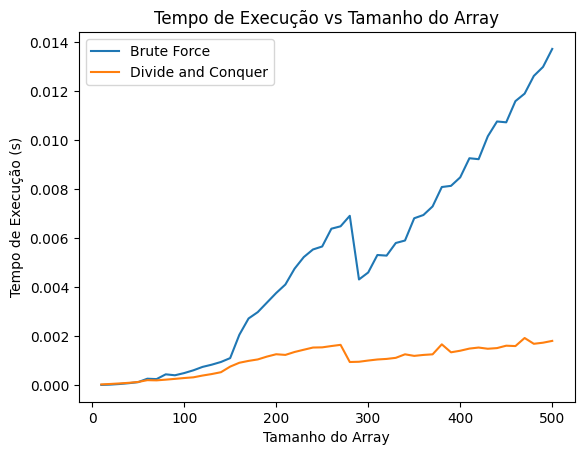

In [ ]:
array_sizes = range(10, 501, 10)  # Tamanhos dos arrays de teste
brute_force_times = []
divide_and_conquer_times = []

for size in array_sizes:
    arr = random_array(size)
    brute_force_time = test_brute_force(arr)
    divide_and_conquer_time = test_divide_and_conquer(arr)
    brute_force_times.append(brute_force_time)
    divide_and_conquer_times.append(divide_and_conquer_time)

# Plotagem dos resultados
plt.plot(array_sizes, brute_force_times, label='Brute Force')
plt.plot(array_sizes, divide_and_conquer_times, label='Divide and Conquer')
plt.xlabel('Tamanho do Array')
plt.ylabel('Tempo de Execução (s)')
plt.title('Tempo de Execução vs Tamanho do Array')
plt.legend()
plt.show()


De forma a responder à nota dada no enunciado achei que a forma mais fácil de demonstrar essa relação seria mesmo demonstrar a representação matemátoca dos gráficos que representam a complexidade destas funções de forma a tornar clara a sua relação, para isso alterei também a escala do gráfico de forma a que seja mais clara a relação entre os 2 gráficos e os valores alcançados.

Documentação para desenvolvimento dos gráficos:https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

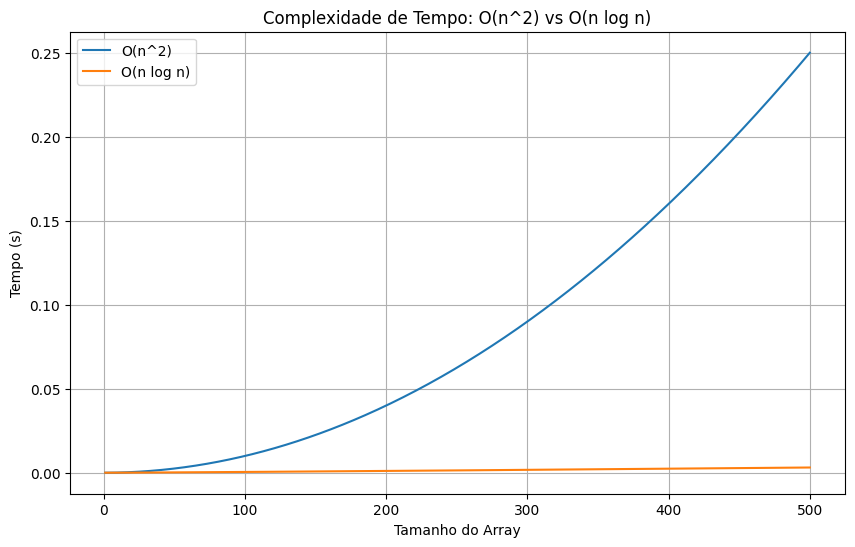

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 501)
y_n_squared = x**2
y_n_logn = x * np.log(x)

# Dividindo os valores do eixo y por uma constante para ajustar a ordem de grandeza
scale_factor = 1e-6  # Ajuste esta constante conforme necessário
y_n_squared_scaled = y_n_squared * scale_factor
y_n_logn_scaled = y_n_logn * scale_factor

plt.figure(figsize=(10, 6))
plt.plot(x, y_n_squared_scaled, label='O(n^2)')
plt.plot(x, y_n_logn_scaled, label='O(n log n)')

plt.xlabel('Tamanho do Array')
plt.ylabel('Tempo (s)')
plt.title('Complexidade de Tempo: O(n^2) vs O(n log n)')
plt.legend()
plt.grid(True)
plt.show()




---



### 4) Extra

4.a) [1 valor] Proponha possíveis melhorias ao algoritmo apresentado em 2) e refaça os testes empíricos
realizados em 3) para avaliar se as melhorias são visíveis na prática.

Nota: É esperado que fundamente o porquê de estar a propor cada melhoria. É também esperada uma
breve discussão sobre a ordem de complexidade do algoritmo melhorado.


Uma possível melhoria ao algoritmo inicial, mantendo o algoritmo de merge sort como algoritmo de ordenação, e sabendo que não necessitamos do algoritmo organizado no resultado final, podemos assumir que não é necessário procurar inversões nesses casos e podemos abandonar essas sublistas do array.

In [ ]:
def count_inversion_array_better(lst, inversions=0):
    length = len(lst)

    if length == 1:
        return lst, inversions

    mid = length // 2

    left, inversions_left = count_inversion_array_better(lst[:mid], inversions)
    right, inversions_right = count_inversion_array_better(lst[mid:], inversions)

    total_inversions = inversions_left + inversions_right
    split_inversions = count_and_merge(left, right)

    return left + right, total_inversions + split_inversions

def count_and_merge(left, right):
    i = j = split_inversions = 0
    merged = []

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
            split_inversions += len(left) - i

    # Se houver elementos restantes na sublista esquerda, eles já estão na ordem correta
    # Se houver elementos restantes na sublista direita, eles são maiores do que todos os elementos na sublista esquerda
    # Portanto, nenhuma inversão é contada nesses casos

    return split_inversions




---


###4) Testes ímpiricos


In [ ]:
array_sizes = [100, 200]  # Tamanhos dos arrays de teste

for size in array_sizes:
    arr = generate_random_unique_list(size)

    brute_force_time = test_brute_force(arr)
    divide_and_conquer_time = test_divide_and_conquer(arr)
    divide_and_conquer_better_time = test_divide_and_conquer_better(arr)

    print(f"Tamanho do array: {size}")
    print(f"Tempo médio de execução (Brute Force): {brute_force_time:.6f} segundos")
    print(f"Tempo médio de execução (Divide and Conquer): {divide_and_conquer_time:.6f} segundos")
    print(f"Tempo médio de execução (Divide and Conquer Melhorado): {divide_and_conquer_better_time:.6f} segundos")

    print()


Tamanho do array: 100
Tempo médio de execução (Brute Force): 0.000669 segundos
Tempo médio de execução (Divide and Conquer): 0.000281 segundos
Tempo médio de execução (Divide and Conquer Melhorado): 0.000246 segundos

Tamanho do array: 200
Tempo médio de execução (Brute Force): 0.002040 segundos
Tempo médio de execução (Divide and Conquer): 0.000766 segundos
Tempo médio de execução (Divide and Conquer Melhorado): 0.000486 segundos



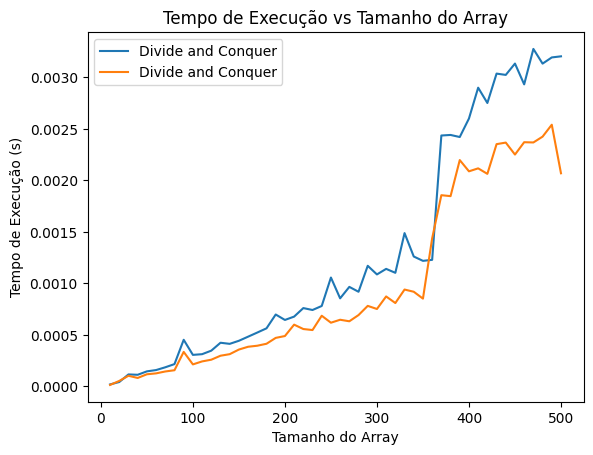

In [ ]:
def test_divide_and_conquer_better(arr):
    start_time = time.time()
    for _ in range(35):
        count_inversion_array_better(arr)
    return (time.time() - start_time) / 35

array_sizes = range(10, 501, 10)  # Tamanhos dos arrays de teste
divide_and_conquer_times = []
divide_and_conquer_better_times = []

for size in array_sizes:
    arr = random_array(size)
    divide_and_conquer_time = test_divide_and_conquer(arr)
    divide_and_conquer_better_time = test_divide_and_conquer_better(arr)
    divide_and_conquer_times.append(divide_and_conquer_time)
    divide_and_conquer_better_times.append(divide_and_conquer_better_time)

# Plotagem dos resultados
plt.plot(array_sizes, divide_and_conquer_times, label='Divide and Conquer')
plt.plot(array_sizes, divide_and_conquer_better_times, label='Divide and Conquer')
plt.xlabel('Tamanho do Array')
plt.ylabel('Tempo de Execução (s)')
plt.title('Tempo de Execução vs Tamanho do Array')
plt.legend()
plt.show()
